# Build the Model
I train the model in Google Colab.However,there are some problems that do not exist in the local.The problems were solved when I changed the version of some packages.

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [1]:
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import regularizers

In [2]:
import pickle
import os
import time
import cv2
import matplotlib.pyplot as plt

In [21]:
!pip install h5py==2.10

     |████████████████████████████████| 2.9MB 26.1MB/s 
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [13]:
def load_data():
    f = open('processed_data/X.pickle','rb')
    X = pickle.load(f)
    f = open('/processed_data/y.pickle','rb')
    y = pickle.load(f)
    return X, y

In [16]:
def create_model(X):
    keras.backend.clear_session()
    model = Sequential()
    model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Dropout(0.5))
    model.add(Activation("relu"))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
    return model

In [37]:
def train_model(model, X, y):
    model.fit(X, y, batch_size=32, epochs=25,validation_split=0.2)
    model.save('detect.h5')

In [14]:
X,y = load_data()

In [ ]:
print(X.shape, X.dtype)

In [38]:
model=create_model(X)

In [43]:
train_model(model, X, y)

Train on 68953 samples, validate on 17239 samples
Epoch 1/25
68953/68953 [==============================] - 18s 265us/step - loss: 0.0202 - accuracy: 0.9925 - val_loss: 0.0518 - val_accuracy: 0.9881
Epoch 2/25
68953/68953 [==============================] - 18s 263us/step - loss: 0.0204 - accuracy: 0.9921 - val_loss: 0.0530 - val_accuracy: 0.9881
Epoch 3/25
68953/68953 [==============================] - 18s 262us/step - loss: 0.0205 - accuracy: 0.9924 - val_loss: 0.0481 - val_accuracy: 0.9886
Epoch 4/25
68953/68953 [==============================] - 18s 262us/step - loss: 0.0186 - accuracy: 0.9932 - val_loss: 0.0557 - val_accuracy: 0.9891
Epoch 5/25
68953/68953 [==============================] - 18s 263us/step - loss: 0.0184 - accuracy: 0.9933 - val_loss: 0.0521 - val_accuracy: 0.9891
Epoch 6/25
68953/68953 [==============================] - 18s 259us/step - loss: 0.0190 - accuracy: 0.9929 - val_loss: 0.0566 - val_accuracy: 0.9878
Epoch 7/25
68953/68953 [==============================] 

In [ ]:
history=model.fit(X, y, batch_size=32, epochs=25,validation_split=0.2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
import tensorflow as tf

Eye is:  closed


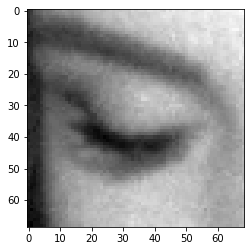

In [16]:
model =tf.keras.models.load_model('detect.h5')
LABEL = ["closed", "open"]
IMG_DIM = 50

test_image_path="img/test.png"
img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(img, (IMG_DIM, IMG_DIM))
image = image.reshape(-1, IMG_DIM, IMG_DIM, 1)
prediction = model.predict_classes(image)
#print(prediction)
print("Eye is: ",LABEL[int(prediction[0])])
plt.imshow(img, cmap='gray')
plt.show()

**I also tried Vgg16，but it could not preform well.**

In [ ]:
def create_model_vgg(X):
        model = Sequential()
        weight_decay = 0.0005

        model.add(Conv2D(64, (3, 3), padding='same',
                          input_shape = X.shape[1:],kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        model.add(Flatten())
        model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Dropout(0.5))
        model.add(Dense(1))
        model.add(Activation('softmax'))
        
        model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
        return model